In [36]:
import pandas as pd
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image  # 마스크 이미지 로드
from konlpy.tag import Okt  # 한글 형태소 분석
import ast
import random

In [13]:
sbs_df = pd.read_csv('/Users/itaehun/python/K-CAT/lth/data/SBS/SBS.csv')
sbs_df['text'] = sbs_df['text'].apply(ast.literal_eval)
sbs_df

,source,label,message_idx,text
0,앙챗,음란채팅,chat0001,"[하이, 아침부터 꼴리네요, ㅎㅇ, 아침부터 꼴려서, 고추나 만지고 잇어요ㅎ, 네;..."
1,앙챗,음란채팅,chat0002,"[저기요 시골 학교 뒤에서 밤에 여학생 따먹은얘기 라인으로 듣기만 할래요?, ㅎㅎ;..."
2,앙챗,음란채팅,chat0003,"[ㅎㅇ, ㅎㅇ, 네 반가워요, 저도 반가워요, 야한얘기?, 다른 얘기.., 어떤?,..."
3,앙챗,단순채팅,chat0004,"[아조씨랑 아무얘기ㄱㄱ, 안녕, 하이하이, 오늘 학교 안가심?, 말이 없누…학교갔나..."
4,앙챗,성매수,chat0005,"[조건, 보실분 구해요, 저 학생이에요, 괜찮아요, 학교 다녀요?, ?, 네 학교 ..."
...,...,...,...,...
1029,동네친구,성매수,chat1030,"[님요. 시간되나여., 안녕하세요., 넹. 만남인가여., 무슨말씀, 조건? 친구?,..."
1030,동네친구,단순채팅,chat1031,"[좋은하루되세요, 안녕하세요., 네네]"
1031,동네친구,단순채팅,chat1032,[안녕하세요 처음이용하는거라 괜찮으면 카톡으로 해요. Win221 친추해주세요~ 친...
1032,동네친구,성매수,chat1033,"[안녕하세요??, 안녕하세요~, ㅈㄱ인가요?, 정확하게 말씀해주세요, 조건인가요?,..."


In [14]:
sbs_df.label.value_counts()

label
음란채팅    330
단순채팅    313
성매수     265
음란만남     64
단순만남     59
기타        3
Name: count, dtype: int64

In [15]:
sbs_df = sbs_df[sbs_df.label.isin(['음란채팅', '성매수', '음란만남'])]
sbs_df

,source,label,message_idx,text
0,앙챗,음란채팅,chat0001,"[하이, 아침부터 꼴리네요, ㅎㅇ, 아침부터 꼴려서, 고추나 만지고 잇어요ㅎ, 네;..."
1,앙챗,음란채팅,chat0002,"[저기요 시골 학교 뒤에서 밤에 여학생 따먹은얘기 라인으로 듣기만 할래요?, ㅎㅎ;..."
2,앙챗,음란채팅,chat0003,"[ㅎㅇ, ㅎㅇ, 네 반가워요, 저도 반가워요, 야한얘기?, 다른 얘기.., 어떤?,..."
4,앙챗,성매수,chat0005,"[조건, 보실분 구해요, 저 학생이에요, 괜찮아요, 학교 다녀요?, ?, 네 학교 ..."
5,앙챗,성매수,chat0006,"[두번 30에 대나여? 소개부탁드립니다, 저 학생인데여;;, 만남 안하시나영.?, ..."
...,...,...,...,...
1021,동네친구,음란채팅,chat1022,"[안녕하세여 ㅎ, 안녕하세요~, 네넹 반가워요 ㅎ 뭐하고 계세영, 그냥 있어요, 어..."
1026,동네친구,성매수,chat1027,"[마음? 몸?, 안녕하세요 무슨 말씀이신지 ㅎ??, 몸 맞는 사람은 안찾아?, 저 ..."
1029,동네친구,성매수,chat1030,"[님요. 시간되나여., 안녕하세요., 넹. 만남인가여., 무슨말씀, 조건? 친구?,..."
1032,동네친구,성매수,chat1033,"[안녕하세요??, 안녕하세요~, ㅈㄱ인가요?, 정확하게 말씀해주세요, 조건인가요?,..."


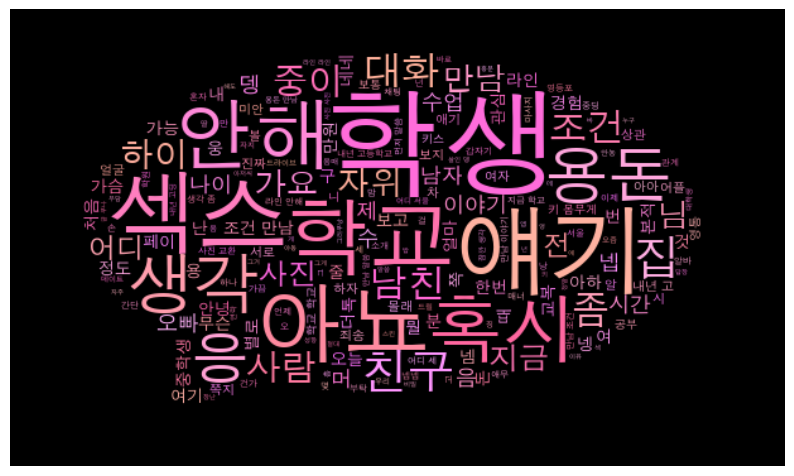

In [40]:
mask_image = np.array(Image.open("/Users/itaehun/python/K-CAT/lth/data/동그라미.png"))  # 사용하고자 하는 마스크 이미지 파일 (경로 수정 필요)

text_data = " ".join([str(sentence) for sublist in sbs_df['text'] for sentence in sublist])

text_data = re.sub(r"[^가-힣\s]", "", text_data) 

okt = Okt()
word_list = okt.nouns(text_data)

with open("/Users/itaehun/python/K-CAT/lth/data/stopwords.txt", "r") as f:
    stopwords = f.readlines()
    stopwords = [x.strip() for x in stopwords]
filtered_words = [word for word in word_list if word not in stopwords]


def pink_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(255, {}, {})".format(random.randint(100, 180), random.randint(150, 255))

wordcloud = WordCloud(
    font_path="/Library/Fonts/AppleGothic.ttf",
    width=1000,
    height=1000,
    background_color="black",
    mask=mask_image,
    contour_width=1, 
    contour_color="black",
).generate(" ".join(filtered_words))

wordcloud.recolor(color_func=pink_color_func)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # 축 제거
plt.show()
